# **Pohon Regresi**

Analyze the `load_iris` dataset from `sklearn.datasets` by using 'sepal length (cm)', 'petal length (cm)', and 'petal width (cm)' as features and 'sepal width (cm)' as the target.

In [ ]:
# ============================================================
# 1. Load dataset
# ============================================================
from sklearn.datasets import load_iris

# Load the iris dataset
iris = load_iris(as_frame=True)

# Create X_new with specified features
X_new = iris.data[['sepal length (cm)', 'petal length (cm)', 'petal width (cm)']]

# Create y_new with the target variable
y_new = iris.data['sepal width (cm)']

print("Ukuran data fitur (X_new):", X_new.shape)
print("Ukuran data target (y_new):", y_new.shape)

Ukuran data fitur (X_new): (150, 3)
Ukuran data target (y_new): (150,)


In [ ]:
# ============================================================
# 2. Split data
# ============================================================
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(
    X_new, y_new, test_size=0.2, random_state=123
)

print("Ukuran X_train_new:", X_train_new.shape)
print("Ukuran X_test_new:", X_test_new.shape)
print("Ukuran y_train_new:", y_train_new.shape)
print("Ukuran y_test_new:", y_test_new.shape)

Ukuran X_train_new: (120, 3)
Ukuran X_test_new: (30, 3)
Ukuran y_train_new: (120,)
Ukuran y_test_new: (30,)


In [ ]:
# ============================================================
# 3. Model dasar (baseline)
# ============================================================
tree_new = DecisionTreeRegressor(random_state=123)
tree_new.fit(X_train_new, y_train_new)

# Prediksi
y_pred_new = tree_new.predict(X_test_new)

# Evaluasi baseline
mse_baseline_new = mean_squared_error(y_test_new, y_pred_new)
r2_baseline_new = r2_score(y_test_new, y_pred_new)

print("\n=== Baseline Model (Iris - tanpa tuning) ===")
print("MSE :", mse_baseline_new)
print("RMSE:", np.sqrt(mse_baseline_new))
print("R²  :", r2_baseline_new)


=== Baseline Model (Iris - tanpa tuning) ===
MSE : 0.16541666666666668
RMSE: 0.40671447806374766
R²  : 0.018039707143328143


In [ ]:
# ============================================================
# 4. Tuning Parameter
# ============================================================
param_dist_new = {
    "max_depth": randint(1, 20), # Iris dataset is smaller, so max_depth can be smaller
    "min_samples_split": randint(2, 20),
    "min_samples_leaf": randint(1, 10),
    "max_features": ["sqrt", "log2", None]
}

random_search_new = RandomizedSearchCV(
    DecisionTreeRegressor(random_state=123),
    param_dist_new,
    n_iter=50,  # berapa banyak kombinasi acak dicoba
    cv=5,
    scoring="neg_mean_squared_error",
    random_state=123,
    n_jobs=-1 # Use all available cores
)

random_search_new.fit(X_train_new, y_train_new)

print("\nBest parameters from RandomizedSearchCV (Iris):", random_search_new.best_params_)
print("Best score (neg MSE) from RandomizedSearchCV (Iris):", random_search_new.best_score_)


Best parameters from RandomizedSearchCV (Iris): {'max_depth': 3, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 16}
Best score (neg MSE) from RandomizedSearchCV (Iris): -0.09781174401699157


In [ ]:
# ============================================================
# 5. Evaluation
# ============================================================
best_tree_new = random_search_new.best_estimator_

y_pred_best_new = best_tree_new.predict(X_test_new)

mse_best_new = mean_squared_error(y_test_new, y_pred_best_new)
r2_best_new = r2_score(y_test_new, y_pred_best_new)

print("\n=== Model Setelah Tuning (Iris) ===")
print("MSE :", mse_best_new)
print("RMSE:", np.sqrt(mse_best_new))
print("R\u00b2  :", r2_best_new)


=== Model Setelah Tuning (Iris) ===
MSE : 0.09524073438843848
RMSE: 0.30861097580682134
R²  : 0.4346239631317549


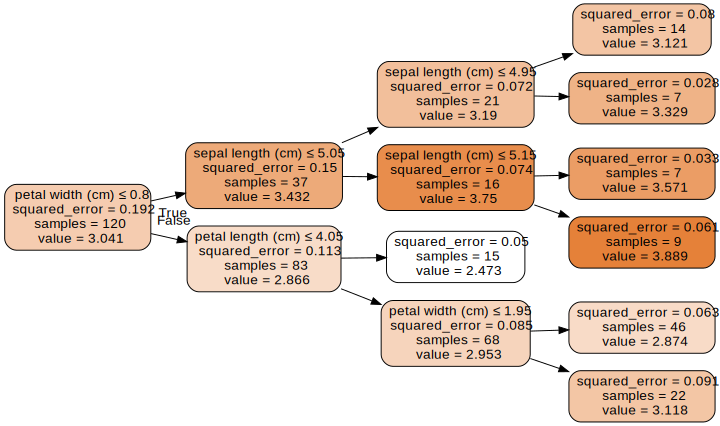

In [ ]:
# ============================================================
# 6. Model terbaik - Visualization
# ============================================================
from sklearn.tree import export_graphviz
import graphviz

# Export the best_tree_new to a DOT format
dot_data_raw_new = export_graphviz(best_tree_new, out_file=None,
                           feature_names=X_new.columns,
                           filled=True, rounded=True,
                           special_characters=True)

# Add size and scale attributes to the DOT string to reduce its overall output size
dot_data_new = dot_data_raw_new.replace('digraph Tree {', 'digraph Tree { graph [size="10,8!", scale=0.5, rankdir=LR];', 1)

# Create a graph from the DOT data
graph_new = graphviz.Source(dot_data_new)

# Render and display the graph
display(graph_new)

In [ ]:
# ============================================================
# 7. Feature Importance
# ============================================================
importances_new = pd.DataFrame({
    "Feature": X_new.columns,
    "Importance": best_tree_new.feature_importances_
}).sort_values(by="Importance", ascending=False)

print("\n=== Feature Importance (Iris) ===")
print(importances_new)


=== Feature Importance (Iris) ===
             Feature  Importance
2   petal width (cm)    0.591952
0  sepal length (cm)    0.223989
1  petal length (cm)    0.184059


## Summary:

### Data Analysis Key Findings

*   **Baseline Model Performance:** The initial `DecisionTreeRegressor` (without hyperparameter tuning) performed poorly, yielding a Mean Squared Error (MSE) of 0.1654, a Root Mean Squared Error (RMSE) of 0.4067, and a very low R-squared (R²) of 0.0180 on the test set.
*   **Hyperparameter Tuning Impact:** After `RandomizedSearchCV`, the model's performance significantly improved. The best model achieved an MSE of 0.0952, an RMSE of 0.3086, and an R² of 0.4346 on the test set, representing a substantial increase in explanatory power compared to the baseline.
*   **Optimal Hyperparameters:** The best hyperparameters identified by `RandomizedSearchCV` were `max_depth: 3`, `max_features: None`, `min_samples_leaf: 4`, and `min_samples_split: 16`.
*   **Feature Importance:** "petal width (cm)" was identified as the most important feature with an importance score of 0.5920, followed by "sepal length (cm)" (0.2240) and "petal length (cm)" (0.1841) in predicting "sepal width (cm)".
*   **Decision Tree Visualization:** A visualization of the optimized decision tree was successfully generated, illustrating the decision rules derived from the best model.

### Insights or Next Steps

*   Hyperparameter tuning through `RandomizedSearchCV` was crucial for improving the `DecisionTreeRegressor`'s performance on the Iris dataset, turning a very poor fit (R²=0.0180) into a moderately predictive model (R²=0.4346). This underscores the importance of optimization for model effectiveness.
*   Given that "petal width (cm)" is the dominant predictor, further investigation into the relationship between petal width and sepal width could provide deeper biological or statistical insights.
